## Model Training

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('intermediate_data/Data_after_Preprocessing.csv')
data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.357605,-0.054980,0.577358,0.734455,3.730369,0.234640,-0.015693,-0.215545,-0.278475,1.087286,...,-0.147894,-0.333394,1.488435,-0.161748,-0.219747,-0.004607,0.002601,0.033419,-0.014938,BENIGN
1,-2.883854,-0.069937,0.911302,1.763146,8.846136,0.620416,-0.056856,1.106617,1.906468,-2.756465,...,0.281532,-2.345995,2.240347,-0.638463,-0.371135,0.010602,0.000644,0.126258,-0.189626,BENIGN
2,-2.416928,-0.056683,0.615325,0.850870,4.304212,0.275767,-0.020437,-0.070482,-0.035276,0.664176,...,-0.101765,-0.544543,1.572782,-0.211976,-0.235381,-0.003066,0.002394,0.043401,-0.034325,BENIGN
3,-2.884704,-0.069978,0.912164,1.765263,8.851561,0.618679,-0.057025,1.104773,1.906895,-2.752492,...,0.279947,-2.333522,2.241149,-0.635723,-0.369948,0.010453,0.000654,0.125925,-0.189603,BENIGN
4,-1.505246,0.080886,-0.504397,0.290405,-0.539263,0.746109,0.100443,0.732424,-1.145808,-0.563201,...,-0.598921,0.116433,0.794828,-0.208920,0.039939,-0.014041,0.000980,-0.049437,-0.001124,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,2.178257,0.488156,-4.526435,-0.924940,-0.730370,0.041666,0.126066,2.523847,-0.216704,-0.206062,...,0.321896,0.518604,-0.024131,-0.644609,-1.450193,0.084712,0.000039,-0.077264,0.303285,BENIGN
2522358,1.731368,0.460769,-4.054541,-0.770272,-0.777757,0.114564,0.125233,2.346295,-0.328230,-0.250994,...,0.335223,0.589274,-0.012050,-0.729908,-1.600768,0.107229,-0.000361,0.060156,0.186588,BENIGN
2522359,2.642674,0.619094,-5.035304,-1.098158,-0.725546,-0.086071,0.125362,2.752021,-0.022972,-0.202706,...,0.405668,0.714635,-0.058023,-0.932889,-2.075104,0.122933,-0.000099,0.085239,0.239972,BENIGN
2522360,1.725979,0.468282,-4.066628,-0.770341,-0.777157,0.107913,0.125125,2.356053,-0.317138,-0.254798,...,0.347547,0.611648,-0.012535,-0.758092,-1.661729,0.110680,-0.000353,0.072124,0.184674,BENIGN


In [35]:
# For cross validation
from sklearn.model_selection import cross_val_score

### - Creating a Balanced Dataset for Binary Classification

As we already know that the following dataset is highly imbalanced, we took the help of SMOTE (Synthetic Minority Over-sampling Technique) to upsample the minority classes while creating a balanced dataset for multi-class classification. This helped us in creating an overall balanced dataset to feed the classification models.

In [36]:
# Creating a balanced dataset for Binary Classification
normal_traffic = data.loc[data['Attack Type'] == 'BENIGN']
intrusions = data.loc[data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7504
0    7496
Name: count, dtype: int64


In [37]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### - SVM -> Support Vector Machine (Binary Classification)

We selected SVM over Logistic Regression because network attack patterns are complex and non-linear, meaning they cannot be separated by a simple straight line. SVM (with an RBF kernel) creates flexible, curved decision boundaries that effectively isolate these complex attack clusters. This resulted in superior accuracy (96%) compared to Logistic Regression, which struggled to distinguish overlapping traffic data."

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [39]:
# Initialize Grid Search
# refit=True ensures the model automatically retrains on the best settings found
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Train the model (This may take a minute)
print("Starting Grid Search... searching for the best hyperparameters.")
grid.fit(X_train_bc, y_train_bc)

print("\nTraining Complete.")

Starting Grid Search... searching for the best hyperparameters.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; tot

In [40]:
# Print the best parameters found
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_score_:.2f}")

# The 'grid' object now acts as your best model automatically
best_svm_model = grid.best_estimator_

Best Hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.97


### - Evaluation

In [41]:
# Predict on the test set
grid_predictions = grid.predict(X_test_bc)

In [42]:
# Print Text Report
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test_bc, grid_predictions))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1913
           1       0.96      0.98      0.97      1837

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



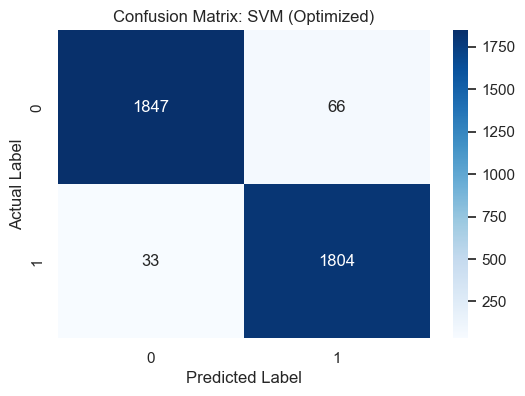

In [43]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bc, grid_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: SVM (Optimized)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### - Creating a Balanced Dataset for Multi-class Classification

In [44]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [45]:
class_counts = data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = data[data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 5000:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Brute Force    5000
Web Attack     5000
DoS            5000
Bot            5000
DDoS           5000
BENIGN         5000
Port Scan      5000
Name: count, dtype: int64

In [47]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### - Random Forest Classifier

**Why?**

***Speed***: KNN is lazy. It does zero work during training but is slow when predicting (it has to calculate distance to 30,000 points every time). In an Intrusion Detection System (IDS), speed is everything. You can't wait 2 seconds to decide if a packet is malicious. Random Forest predicts almost instantly.

***Feature Importance***: Random Forest can tell you which columns (e.g., "Source Port") were most important. KNN cannot.

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Create the random grid
# We provide lists of options. The algorithm will randomly pick from these.
random_grid = {
    'n_estimators': [50, 100, 200, 300],        # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],           # Number of features to consider at every split
    'max_depth': [10, 20, 30, 40, 50, None],    # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                  # Method of selecting samples for training each tree
}

print("Parameter grid defined.")

Parameter grid defined.


In [50]:
# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
# n_iter=50: It will train 50 different models.
# cv=3: Each model is tested 3 times (Cross-Validation).
# n_jobs=-1: Use all computer processor cores to speed it up.
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
print("Starting Randomized Search... this might take 1-2 minutes.")
rf_random.fit(X_train, y_train)
print("Optimization Complete.")

Starting Randomized Search... this might take 1-2 minutes.
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  14.7s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min

In [51]:
# Get the best parameters and score
print(f"Best Accuracy found: {rf_random.best_score_:.2f}")
print("Best Hyperparameters:")
print(rf_random.best_params_)

# The 'rf_random' object automatically acts as the best model found
best_rf_model = rf_random.best_estimator_

Best Accuracy found: 0.99
Best Hyperparameters:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


### - Evaluation

In [52]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

In [53]:
# Classification Report (Precision/Recall per attack type)
print("Final Classification Report:\n")
print(classification_report(y_test, y_pred))

Final Classification Report:

              precision    recall  f1-score   support

      BENIGN       0.98      0.98      0.98      1252
         Bot       0.99      1.00      0.99      1280
 Brute Force       1.00      0.99      1.00      1250
        DDoS       1.00      1.00      1.00      1223
         DoS       0.99      0.99      0.99      1249
   Port Scan       1.00      1.00      1.00      1231
  Web Attack       1.00      0.99      1.00      1265

    accuracy                           0.99      8750
   macro avg       0.99      0.99      0.99      8750
weighted avg       0.99      0.99      0.99      8750



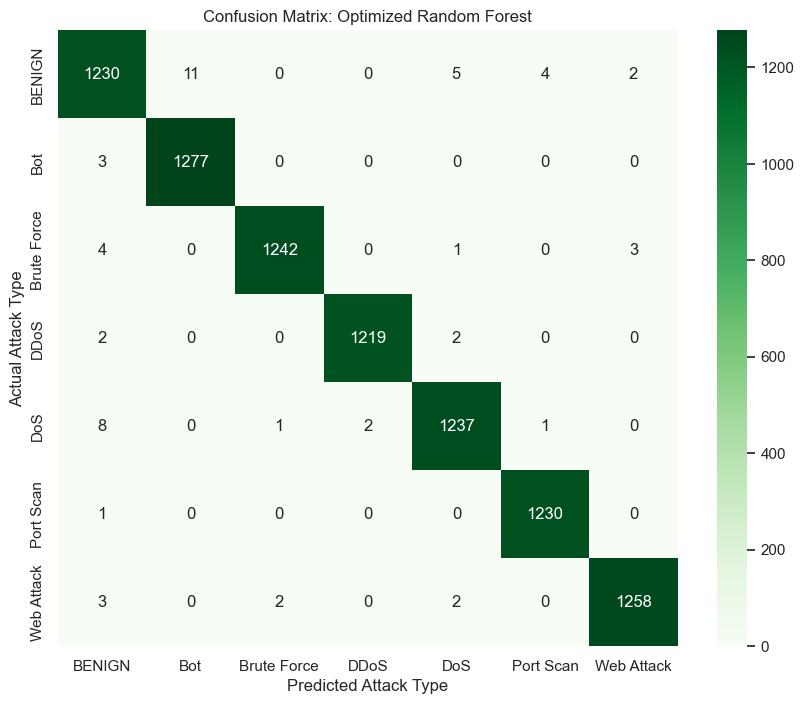

In [54]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
# We get the class names from the model to label the axes correctly
classes = best_rf_model.classes_

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix: Optimized Random Forest')
plt.ylabel('Actual Attack Type')
plt.xlabel('Predicted Attack Type')
plt.show()

While our Binary model was effective, the Multi-Class Random Forest model outperformed it significantly. It achieved 99% accuracy across 7 different categories. Most notably, it successfully distinguished between 'DoS' and 'DDoS' attacks—which are notoriously difficult to separate—with fewer than 10 errors. This proves that Random Forest is the superior algorithm for granular attack classification."

In [56]:
import joblib
import os

model_dir = 'saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the Binary Classification Model
svm_model_path = os.path.join(model_dir, 'binary_svm_model.pkl')
joblib.dump(best_svm_model, svm_model_path)
print(f"Binary SVM model saved to: {svm_model_path}")

# Save the Multi-Class Classification Model
rf_model_path = os.path.join(model_dir, 'multiclass_rf_model.pkl')
joblib.dump(best_rf_model, rf_model_path)
print(f"Multi-Class Random Forest model saved to: {rf_model_path}")

print("\nAll models saved successfully!")

Binary SVM model saved to: saved_models/binary_svm_model.pkl
Multi-Class Random Forest model saved to: saved_models/multiclass_rf_model.pkl

All models saved successfully!
